Using Theano backend.


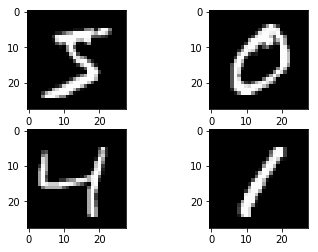

In [1]:
%matplotlib inline
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))



# show the plot
plt.show()

In [2]:
# set batch and epoch sizes
batch_size = 200
epochs = 1
num_classes=10
# fix random seed for reproducibility
seed = 93
numpy.random.seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28

print("Variables intialized")

Variables intialized


In [3]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols).astype('float32')
input_shape = (1, img_rows, img_cols)
X_train /= 255
X_test /= 255


In [4]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


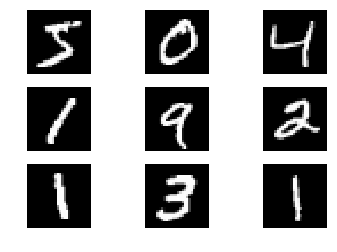

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i,0], cmap='gray')
    plt.axis("off")

In [6]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [8]:

# Fit the model# Fit th 
print("-")
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

-
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 50s 826us/step - loss: 0.3911 - acc: 0.8776 - val_loss: 0.0757 - val_acc: 0.9749


In [10]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

print('Test Loss:     %.2f%%' % (scores[0]))
print('Test Accuracy: {:.2%}'.format(scores[1]))
print('Test Error:    {:.2%}'.format(1-scores[1]))

[0.075714826712291683, 0.97489999999999999]
Test Loss:     0.08%
Test Accuracy: 97.49%
Test Error:    2.51%
